# CSE 351 Final Project: Animal Shelters


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

df = pd.read_csv('shelter_train.csv')
test = pd.read_csv('shelter_test.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
del df['DateTime']
df = df[df.SexuponOutcome != "Unknown"] #Remove unknown sex
df = df[df['AgeuponOutcome'].notna()] #Remove rows with missing age
df = df[df['SexuponOutcome'].notna()] #Remove rows with missing sex
df['num'] = df['AgeuponOutcome'].str.extract('(\d+)').astype(int)
df['AgeuponOutcome'] = np.where(df['AgeuponOutcome'].str.contains("year") , df['num']*365, df['AgeuponOutcome']) #convert years to days
df['AgeuponOutcome'] = np.where(df['AgeuponOutcome'].str.islower() & df['AgeuponOutcome'].str.contains("month") ,df['num']*30 , df['AgeuponOutcome']) #convert month to days
df['AgeuponOutcome'] = np.where(df['AgeuponOutcome'].str.islower() & df['AgeuponOutcome'].str.contains("week") ,df['num']*7 , df['AgeuponOutcome']) #convert weeks to days
df['AgeuponOutcome'] = np.where(df['AgeuponOutcome'].str.islower() & df['AgeuponOutcome'].str.contains("day") ,df['num'] , df['AgeuponOutcome'])
del df['num']
df = df[df.AgeuponOutcome != 0] #drop rows with age of 0 (some listed as 0 years old)
#Clean test data
test['DateTime'] = pd.to_datetime(test['DateTime'])
test['Hour'] = test['DateTime'].dt.hour
test['Day'] = test['DateTime'].dt.day
test['Month'] = test['DateTime'].dt.month
test['Year'] = test['DateTime'].dt.year
del test['DateTime']
test = test[test.SexuponOutcome != "Unknown"] #Remove unknown sex
test = test[test['AgeuponOutcome'].notna()] #Remove rows with missing age
test = test[test['SexuponOutcome'].notna()] #Remove rows with missing sex
test['num'] = test['AgeuponOutcome'].str.extract('(\d+)').astype(int)
test['AgeuponOutcome'] = np.where(test['AgeuponOutcome'].str.contains("year") , test['num']*365, test['AgeuponOutcome']) #convert years to days
test['AgeuponOutcome'] = np.where(test['AgeuponOutcome'].str.islower() & test['AgeuponOutcome'].str.contains("month") ,test['num']*30 , test['AgeuponOutcome']) #convert month to days
test['AgeuponOutcome'] = np.where(test['AgeuponOutcome'].str.islower() & test['AgeuponOutcome'].str.contains("week") ,test['num']*7 , test['AgeuponOutcome']) #convert weeks to days
test['AgeuponOutcome'] = np.where(test['AgeuponOutcome'].str.islower() & test['AgeuponOutcome'].str.contains("day") ,test['num'] , test['AgeuponOutcome'])
del test['num']
test = test[test.AgeuponOutcome != 0] #drop rows with age of 0 (some listed as 0 years old)

In [ ]:
df = df.drop(['AnimalID', 'Name'], axis=1) #Drop the AnimalID and Name values because we don't need it
test = test.drop(['AnimalID', 'Name'], axis=1)
df.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Hour,Day,Month,Year
0,Return_to_owner,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,18,12,2,2014
1,Euthanasia,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,12,13,10,2013
2,Adoption,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,12,31,1,2015
3,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,19,11,7,2014
4,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,12,15,11,2013


## Cat EDA

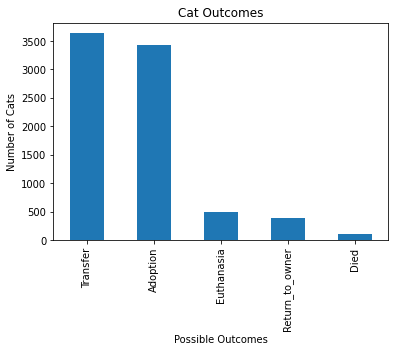

In [ ]:
cat = df[df.AnimalType == "Cat"] # remove dogs
testcat = test[test.AnimalType == "Cat"]
ax = cat['OutcomeType'].value_counts().plot(kind='bar', title = "Cat Outcomes")
ax.set_ylabel("Number of Cats")
ax.set_xlabel("Possible Outcomes")
adopted = cat[cat.OutcomeType == "Adoption"]
eutha = cat[cat.OutcomeType == "Euthanasia"]
transfer = cat[cat.OutcomeType == "Transfer"]
owner = cat[cat.OutcomeType == "Return_to_owner"]
diedcat = cat[cat.OutcomeType == "Return_to_owner"]

Text(0.5, 0, 'Hour')

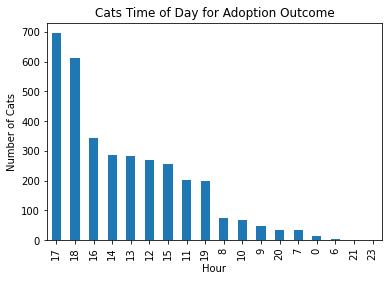

In [ ]:
ax = adopted['Hour'].value_counts().plot(kind='bar', title = "Cats Time of Day for Adoption Outcome")
ax.set_ylabel("Number of Cats")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

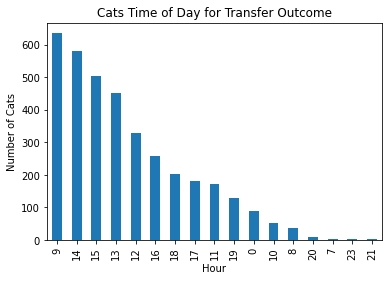

In [ ]:
ax = transfer['Hour'].value_counts().plot(kind='bar', title = "Cats Time of Day for Transfer Outcome")
ax.set_ylabel("Number of Cats")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

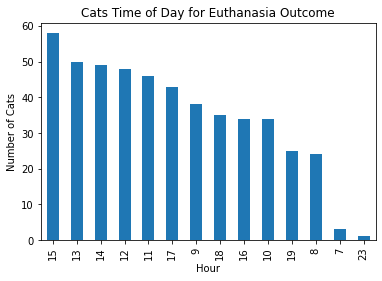

In [ ]:
ax = eutha['Hour'].value_counts().plot(kind='bar', title = "Cats Time of Day for Euthanasia Outcome")
ax.set_ylabel("Number of Cats")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

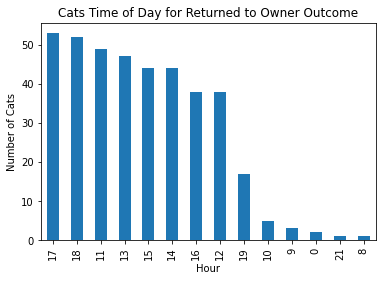

In [ ]:
ax = owner['Hour'].value_counts().plot(kind='bar', title = "Cats Time of Day for Returned to Owner Outcome")
ax.set_ylabel("Number of Cats")
ax.set_xlabel("Hour")


For cats, typically they are returned to their owners or adopted around 5 to 6 pm. Transfers and Euthanasia occur around 1 to 3 pm, but many transfers happen at 9 am.



In [ ]:
cat['Breed'] = np.where(cat['Breed'].str.contains("Shorthair") ,"Domestic Shorthair", cat['Breed']) 
cat['Breed'] = np.where(cat['Breed'].str.contains("Medium") ,"Domestic Medium Hair", cat['Breed']) 
cat['Breed'] = np.where(cat['Breed'].str.contains("Long") ,"Domestic longhair", cat['Breed']) 
cat['Breed'] = np.where(cat['Breed'].str.contains("Domestic") , cat['Breed'], "Other")
#Test data
testcat['Breed'] = np.where(testcat['Breed'].str.contains("Shorthair") ,"Domestic Shorthair", testcat['Breed']) 
testcat['Breed'] = np.where(testcat['Breed'].str.contains("Medium") ,"Domestic Medium Hair", testcat['Breed']) 
testcat['Breed'] = np.where(testcat['Breed'].str.contains("Long") ,"Domestic longhair", testcat['Breed']) 
testcat['Breed'] = np.where(testcat['Breed'].str.contains("Domestic") , testcat['Breed'], "Other")

Grouping together the breeds into four catagories to reduce number of unqiue values. Researching cat breeds shows that domestic means mix or unknown so those were grouped together. The non-mix breed cats are grouped together as "Other".

In [ ]:
cat['Color'] = np.where(cat['Color'].str.contains("rown") ,"Brown", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Tortie") ,"Toritie", cat['Color']) 
cat['Color'] = np.where(cat['Color'].str.contains("Torbie") ,"Toribie", cat['Color']) 
cat['Color'] = np.where(cat['Color'].str.contains("ream") ,"Buff", cat['Color']) 
cat['Color'] = np.where(cat['Color'].str.contains("Tan") ,"Buff", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Buff") ,"Buff", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("hocolate") ,"Brown", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("lue") ,"Blue", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Point") ,"Color Point", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Calico") ,"Calico", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Tricolor") ,"Calico", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("range") ,"Orange", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Black/Black") ,"Black", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("White/Black") ,"Black/White", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("White/White") ,"White", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("White/Yellow") ,"Buff", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Black Smoke") ,"Black Smoke", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Silver Tabby") ,"Silver Tabby", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Gray Tabby") ,"Gray Tabby", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("Black Tabby") ,"Black Tabby", cat['Color'])
cat['Color'] = np.where(cat['Color'].str.contains("White/Gray") ,"Gray/White", cat['Color'])
#Test data
testcat['Color'] = np.where(testcat['Color'].str.contains("rown") ,"Brown", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Tortie") ,"Toritie", testcat['Color']) 
testcat['Color'] = np.where(testcat['Color'].str.contains("Torbie") ,"Toribie", testcat['Color']) 
testcat['Color'] = np.where(testcat['Color'].str.contains("ream") ,"Buff", testcat['Color']) 
testcat['Color'] = np.where(testcat['Color'].str.contains("Tan") ,"Buff", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Buff") ,"Buff", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("hocolate") ,"Brown", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("lue") ,"Blue", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Point") ,"Color Point", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Calico") ,"Calico", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Tricolor") ,"Calico", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("range") ,"Orange", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Black/Black") ,"Black", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("White/Black") ,"Black/White", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("White/White") ,"White", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("White/Yellow") ,"Buff", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Black Smoke") ,"Black Smoke", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Silver Tabby") ,"Silver Tabby", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Gray Tabby") ,"Gray Tabby", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("Black Tabby") ,"Black Tabby", testcat['Color'])
testcat['Color'] = np.where(testcat['Color'].str.contains("White/Gray") ,"Gray/White", testcat['Color'])

cat['Color'].unique()

array(['Buff', 'Blue', 'Orange', 'Brown', 'White', 'Calico', 'Toribie',
       'Black/White', 'Black', 'Toritie', 'Color Point', 'Black Tabby',
       'Gray Tabby', 'Black Smoke', 'Gray/White', 'Silver Tabby',
       'Agouti', 'Gray', 'Silver', 'Black/Silver'], dtype=object)

In order to reduce number of unique values in Color column, alike colors are grouped together.

Text(0.5, 0, 'Sex Upon Outcome')

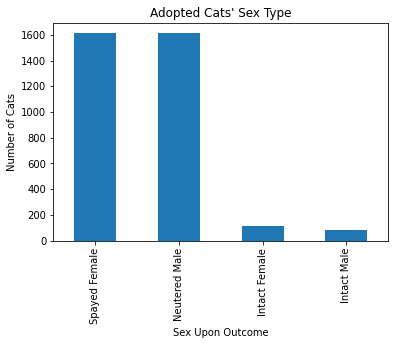

In [ ]:
ax = adopted['SexuponOutcome'].value_counts().plot(kind='bar',title = "Adopted Cats' Sex Type")
ax.set_ylabel("Number of Cats")
ax.set_xlabel("Sex Upon Outcome")

In [ ]:
print(" Mean Age Adopted Cats: ", adopted['AgeuponOutcome'].mean(), '\n', "Mean Age Transfer Cats: ",  transfer['AgeuponOutcome'].mean(), '\n', "Mean Age Returned to Owner Cats: ", owner['AgeuponOutcome'].mean(), '\n', "Mean Age Euthanized Cats: ", eutha['AgeuponOutcome'].mean(), '\n', "mean Age Died Cats", diedcat['AgeuponOutcome'].mean())

 Mean Age Adopted Cats:  425.80093539900616 
 Mean Age Transfer Cats:  410.21318681318684 
 Mean Age Returned to Owner Cats:  1438.1802030456852 
 Mean Age Euthanized Cats:  1317.514344262295 
 mean Age Died Cats 1438.1802030456852


Cats who were spayed and neutered were much more likley to have been adopted than ones who were not. Ages' of cats that were adopted or transfered were much lower than those with other outcomes.

## Dog EDA

In [ ]:
df.nunique()


DateTime          18255
OutcomeType           5
AnimalType            2
SexuponOutcome        4
AgeuponOutcome       42
Breed              1248
Color               332
dtype: int64

In [ ]:
df['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'],
      dtype=object)

In [ ]:
dog = df[df.AnimalType == "Dog"] #Remove Cat
testdog = test[test.AnimalType == "Dog"]
dog.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Hour,Day,Month,Year
0,Return_to_owner,Dog,Neutered Male,365,Shetland Sheepdog Mix,Brown/White,18,12,2,2014
2,Adoption,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,12,31,1,2015
4,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,12,15,11,2013
5,Transfer,Dog,Intact Female,30,Cairn Terrier/Chihuahua Shorthair,Black/Tan,13,25,4,2014
8,Adoption,Dog,Spayed Female,150,American Pit Bull Terrier Mix,Red/White,17,4,2,2014


In [ ]:
dog.isnull().sum()

OutcomeType       0
AnimalType        0
SexuponOutcome    0
AgeuponOutcome    0
Breed             0
Color             0
Hour              0
Day               0
Month             0
Year              0
dtype: int64

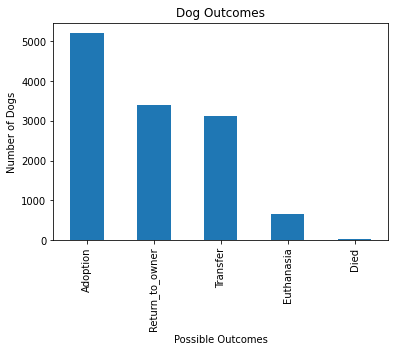

In [ ]:
ax = dog['OutcomeType'].value_counts().plot(kind='bar', title = "Dog Outcomes")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Possible Outcomes")
returnOwner = dog[dog.OutcomeType == "Return_to_owner"]
euthanasia = dog[dog.OutcomeType == "Euthanasia"]
adoption = dog[dog.OutcomeType == "Adoption"]
transfer = dog[dog.OutcomeType == "Transfer"]
died = dog[dog.OutcomeType == "Died"]

For the dogs' outcomes, the first is adoption, second is return to the owner, third is transfer, fourth is euthanasis, and then died.

Text(0, 0.5, 'Number of Dogs')

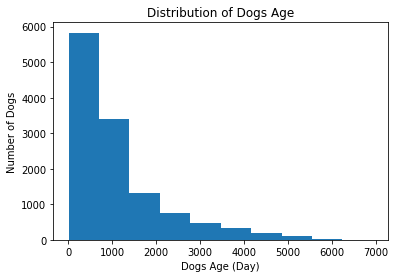

In [ ]:
dog.AgeuponOutcome.plot(kind='hist')
plt.title('Distribution of Dogs Age')
plt.xlabel('Dogs Age (Day)')
plt.ylabel('Number of Dogs')

In [ ]:
print(" Mean Age Adopted Dogs: ", adoption['AgeuponOutcome'].mean(), '\n', "Mean Age Transfer Dogs: ",  transfer['AgeuponOutcome'].mean(), '\n', "Mean Age Returned to Owner Dogs: ", returnOwner['AgeuponOutcome'].mean(), '\n', "Mean Age Euthanized Dogs: ", euthanasia['AgeuponOutcome'].mean(), '\n', "mean Age Died Dogs", died['AgeuponOutcome'].mean())

 Mean Age Adopted Dogs:  713.3467587265055 
 Mean Age Transfer Dogs:  816.427930813581 
 Mean Age Returned to Owner Dogs:  1503.5309474919331 
 Mean Age Euthanized Dogs:  1580.1450151057402 
 mean Age Died Dogs 1090.0526315789473


Text(0.5, 0, 'Sex Upon Outcome')

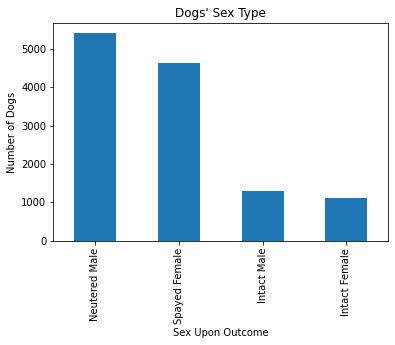

In [ ]:
ax = dog['SexuponOutcome'].value_counts().plot(kind='bar', title = "Dogs' Sex Type")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Sex Upon Outcome")

There are much more dogs who are desexualized.

Text(0.5, 0, 'Sex Upon Outcome')

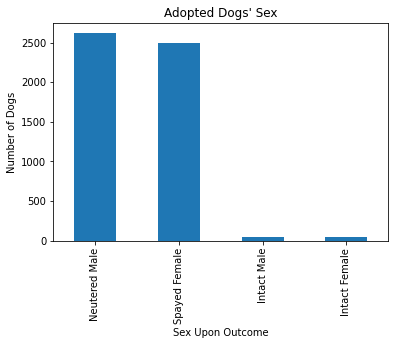

In [ ]:
ax = adoption['SexuponOutcome'].value_counts().plot(kind='bar', title = "Adopted Dogs' Sex")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Sex Upon Outcome")

Almost "Neutered Male" and "Spayed Female" are adopted. So, to be adopted, dogs should be desexualized.

Text(0.5, 0, 'Sex Upon Outcome')

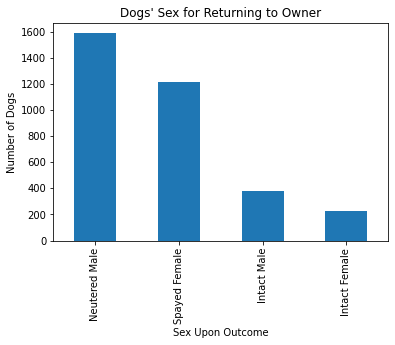

In [ ]:
ax = returnOwner['SexuponOutcome'].value_counts().plot(kind='bar', title = "Dogs' Sex for Returning to Owner")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Sex Upon Outcome")

I assume that returning to owner is not related with sex. The desexualized dogs is more than dogs who have intact sex for dogs returning to owner, but I think this is because the total number of desexualized dogs are much more than dogs who have intact sex.

Text(0.5, 0, 'Sex Upon Outcome')

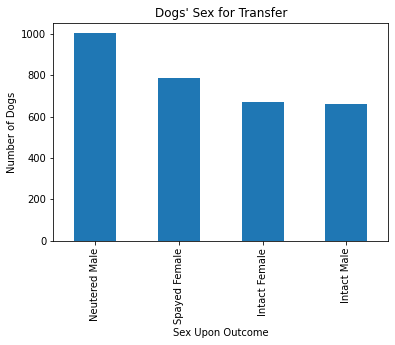

In [ ]:
ax = transfer['SexuponOutcome'].value_counts().plot(kind='bar', title = "Dogs' Sex for Transfer")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Sex Upon Outcome")

For the outcome of "Transfer," the desexualized dogs are little more than inact sex dogs, but almost similar.

Text(0.5, 0, 'Sex Upon Outcome')

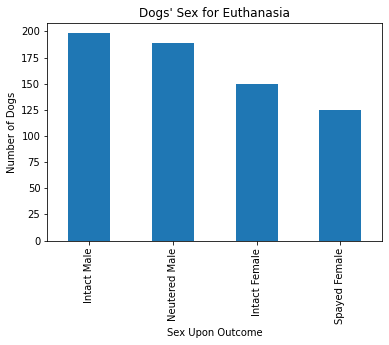

In [ ]:
ax = euthanasia['SexuponOutcome'].value_counts().plot(kind='bar', title = "Dogs' Sex for Euthanasia")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Sex Upon Outcome")

The most dogs' sex that administer euthansia is "Intact Male", second is "Neutered Male", third is "Intact Female" and then "Spayed Female." For this data, I assume that male dogs more get euthanasia than female dogs because the male dog's total number is more than female's. Also, intact sex dogs little more get euthanasia than desexualized dogs.

Text(0.5, 0, 'Sex Upon Outcome')

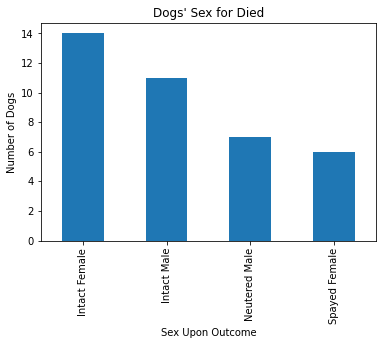

In [ ]:
ax = died['SexuponOutcome'].value_counts().plot(kind='bar', title = "Dogs' Sex for Died")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Sex Upon Outcome")

The intact sex dogs more died than desexualized dogs. I assume that this is because there are diseases that are more likely to affect intact sex dogs, especially females.

Text(0.5, 0, 'Hour')

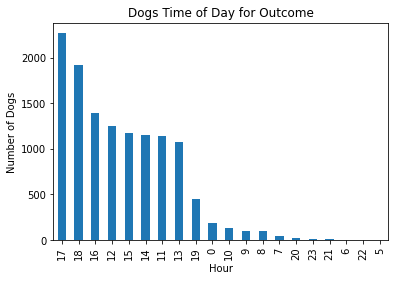

In [ ]:
ax = dog['Hour'].value_counts().plot(kind='bar', title = "Dogs Time of Day for Outcome")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

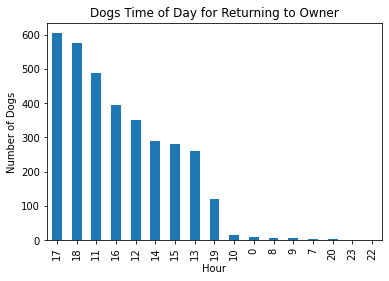

In [ ]:
ax = returnOwner['Hour'].value_counts().plot(kind='bar', title = "Dogs Time of Day for Returning to Owner")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

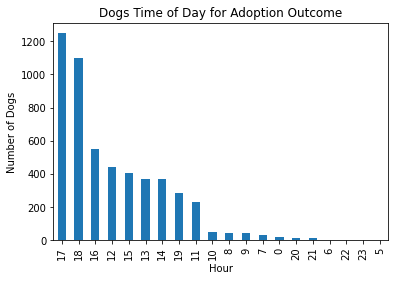

In [ ]:
ax = adoption['Hour'].value_counts().plot(kind='bar', title = "Dogs Time of Day for Adoption Outcome")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

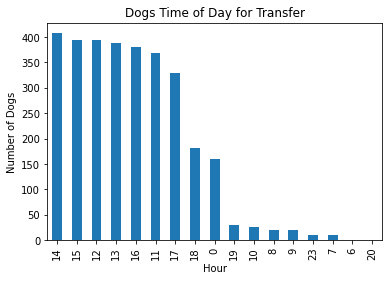

In [ ]:
ax = transfer['Hour'].value_counts().plot(kind='bar', title = "Dogs Time of Day for Transfer")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

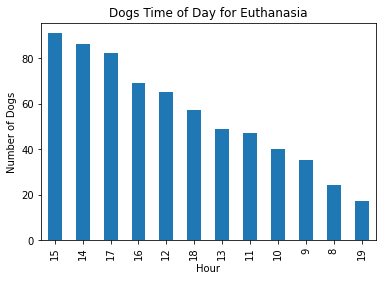

In [ ]:
ax = euthanasia['Hour'].value_counts().plot(kind='bar', title = "Dogs Time of Day for Euthanasia")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Hour")

Text(0.5, 0, 'Hour')

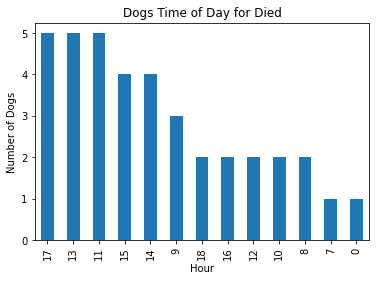

In [ ]:
ax = died['Hour'].value_counts().plot(kind='bar', title = "Dogs Time of Day for Died")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Hour")

In [ ]:
dog['Breed'].unique()

array(['Mix', 'Purebred'], dtype=object)

In [ ]:
dog['Breed'] = np.where(dog['Breed'].str.contains("Mix"),"Mix", dog['Breed']) 
dog['Breed'] = np.where(dog['Breed'].str.contains("Mix") , dog['Breed'], "Purebred")
#Test Data
testdog['Breed'] = np.where(testdog['Breed'].str.contains("Mix"),"Mix", testdog['Breed']) 
testdog['Breed'] = np.where(testdog['Breed'].str.contains("Mix") , testdog['Breed'], "Purebred")
dog['Breed'].unique() 

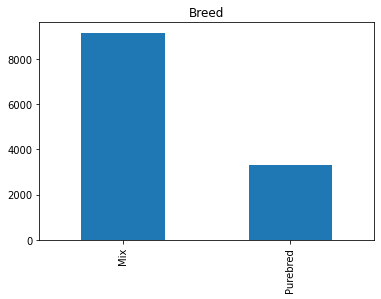

In [ ]:
ax = dog['Breed'].value_counts().plot(kind='bar', title = "Breed")

Text(0.5, 0, 'Breed')

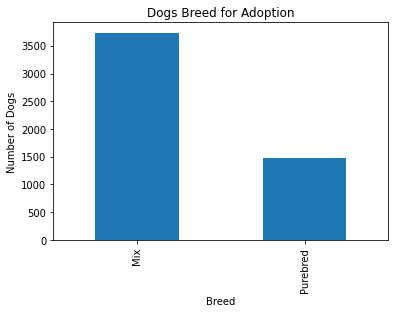

In [ ]:
ax = adoption['Breed'].value_counts().plot(kind='bar', title = "Dogs Breed for Adoption")
ax.set_ylabel("Number of Dogs")
ax.set_xlabel("Breed")

There are too many types of breed of dogs, so I reduce the types of breed to "Mix" and "Purebred".

In [ ]:
dog['Color'] = np.where(dog['Color'].str.contains("White/") ,"White Mix", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Black/") ,"Black Mix", dog['Color']) 
dog['Color'] = np.where(dog['Color'].str.contains("Brown/") ,"Brown", dog['Color']) 
dog['Color'] = np.where(dog['Color'].str.contains("Blue/") ,"Blue", dog['Color']) 
dog['Color'] = np.where(dog['Color'].str.contains("Blue Tick/") ,"Blue", dog['Color']) 
dog['Color'] = np.where(dog['Color'].str.contains("/Blue") ,"Blue", dog['Color']) 
dog['Color'] = np.where(dog['Color'].str.contains("Tan/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Red/") ,"Red", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Brown Brindle/") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Chocolate/") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Gray/") ,"Gray", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Yellow Brindle/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Fawn/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Red Tick/") ,"Red", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Brown Merle/") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Brown Tiger/") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Brown Tiger") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Liver/") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Apricot/") ,"Orange", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Red Merle/") ,"Red", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Blue Merle/") ,"Blue", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Buff/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Sable/") ,"Sable", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Blue Tiger/") ,"Blue", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Yellow/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Tricolor/") ,"Tricolor", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Black Brindle/") ,"Black Mix", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Silver/") ,"Gray", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Cream/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Gold/") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Orange/") ,"Orange", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Black Smoke/") ,"Black Mix", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Blue Smoke/") ,"Blue", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Ruddy/") ,"Red", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Liver Tick/") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Black Tiger/") ,"Black Mix", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Tan") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Silver") ,"Gray", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Yellow") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Brown") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Blue") ,"Blue", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Cream") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Chocolate") ,"Brown", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Fawn") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Apricot") ,"Orange", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Gold") ,"Buff", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Red") ,"Red", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Black Brindle") ,"Black", dog['Color'])
dog['Color'] = np.where(dog['Color'].str.contains("Liver") ,"Brown", dog['Color'])


#Test data
testdog['Color'] = np.where(testdog['Color'].str.contains("White/") ,"White Mix", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Black/") ,"Black Mix", testdog['Color']) 
testdog['Color'] = np.where(testdog['Color'].str.contains("Brown/") ,"Brown", testdog['Color']) 
testdog['Color'] = np.where(testdog['Color'].str.contains("Blue/") ,"Blue", testdog['Color']) 
testdog['Color'] = np.where(testdog['Color'].str.contains("Blue Tick/") ,"Blue", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("/Blue") ,"Blue", testdog['Color']) 
testdog['Color'] = np.where(testdog['Color'].str.contains("Tan/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Red/") ,"Red", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Brown Brindle/") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Chocolate/") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Gray/") ,"Gray", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Yellow Brindle/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Fawn/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Red Tick/") ,"Red", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Brown Merle/") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Brown Tiger/") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Brown Tiger") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Liver/") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Apricot/") ,"Orange", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Red Merle/") ,"Red", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Blue Merle/") ,"Blue", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Buff/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Sable/") ,"Sable", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Blue Tiger/") ,"Blue", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Yellow/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Tricolor/") ,"Tricolor", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Black Brindle/") ,"Black Mix", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Silver/") ,"Gray", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Cream/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Gold/") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Orange/") ,"Orange", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Black Smoke/") ,"Black Mix", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Blue Smoke/") ,"Blue", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Ruddy/") ,"Red", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Liver Tick/") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Black Tiger/") ,"Black Mix", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Tan") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Silver") ,"Gray", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Yellow") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Brown") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Blue") ,"Blue", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Cream") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Chocolate") ,"Brown", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Fawn") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Apricot") ,"Orange", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Gold") ,"Buff", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Red") ,"Red", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Black Brindle") ,"Black", testdog['Color'])
testdog['Color'] = np.where(testdog['Color'].str.contains("Liver") ,"Brown", testdog['Color'])

dog['Color'].unique()

array(['Brown', 'Blue', 'Buff', 'Black Mix', 'Red', 'White', 'Gray',
       'White Mix', 'Black', 'Tricolor', 'Sable', 'Orange'], dtype=object)

##K-Nearest Neighbor Model Prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
le = preprocessing.LabelEncoder()
frames = [dog, cat]
df = pd.concat(frames)
frames = [testdog, testcat]
test = pd.concat(frames)
frames = [df, test]
temp = pd.concat(frames)
le.fit(['Dog','Cat'])
df['AnimalType'] = le.transform(df['AnimalType'])
test['AnimalType'] = le.transform(test['AnimalType'])
le.fit(['Spayed Female','Neutered Male', 'Intact Male', 'Intact Female'])
df['SexuponOutcome'] = le.transform(df['SexuponOutcome'])
test['SexuponOutcome'] = le.transform(test['SexuponOutcome'])
le.fit(temp['Breed'].unique())
df['Breed'] = le.transform(df['Breed'])
test['Breed'] = le.transform(test['Breed'])
le.fit(temp['Color'].unique())
df['Color'] = le.transform(df['Color'])
test['Color'] = le.transform(test['Color'])
train_x = df.drop('OutcomeType', axis=1)
train_y = df['OutcomeType']
test_x = test.drop('OutcomeType', axis=1)
test_y = test['OutcomeType']
neigh = KNeighborsClassifier()
neigh.fit(train_x,train_y)
pred = neigh.predict(test_x)
print ("Model accuracy score : ",accuracy_score(test_y, pred))

Model accuracy score :  0.5423332032774093


The K Nearest Neighbor classification algorithm stores the cases from the train dataset, then classifies new cases based on what is most common amongst its k nearest neighbors. The neighbors are determined by a distance function. An accuracy of 54% is much higher randomly selecting a classification (20%). However, 54% is not ideal and represents a a solid baseline.

## Naive-Bayes Model Prediction

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
pred = gnb.predict(test_x)
print ("Model accuracy score : ",accuracy_score(test_y, pred))

Model accuracy score :  0.6145142411236831


The Naive-Bayes machine learning algorithm is a classification algorithm that uses probability for predictions. The algorithm first calculates the probability for a given class label and then the probability with each attribute. Then using Bayes formula posterior probability is calculated. The class with highest probability is selected. This method proved to be more accurate than K-nearest neighbor, resulting in an accuracy of 61%.

## Random Forests Model Prediction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x,train_y)
pred = rfc.predict(test_x)
print ("Model accuracy score : ",accuracy_score(test_y, pred))

Model accuracy score :  0.6455325790089739


The Random Forests machine learning algorithm classifies data by sampling the training dataset and using it to create decision trees. These decision trees are used to generate predictions. When predicting, a vote occurs where each tree votes for a classification for each predicted result. The value with the most votes is selected. The accuracy of the model is almost 65% which is the most accurate model.